In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
from statsmodels.tsa import api as tsa
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA


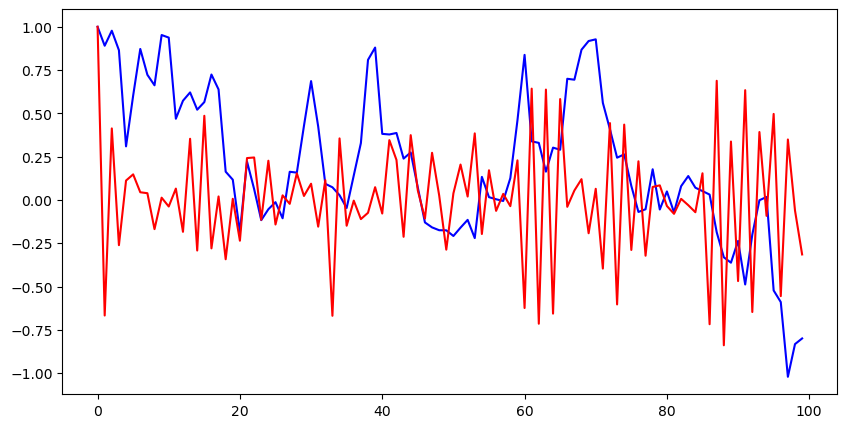

In [2]:
z1 = np.zeros(100)
z2 = np.zeros(100)
z1[0] = 1
z2[0] = 1
for i in range(1,100):
 z1[i] = 0.8 * z1[i - 1] + 0.2 * np.random.randn()
 z2[i] = -0.8 * z2[i - 1] + 0.2 * np.random.randn()
plt.figure(figsize = (10, 5))
plt.plot(z1, 'b')
plt.plot(z2, 'r')
plt.show()

<Figure size 1000x500 with 0 Axes>

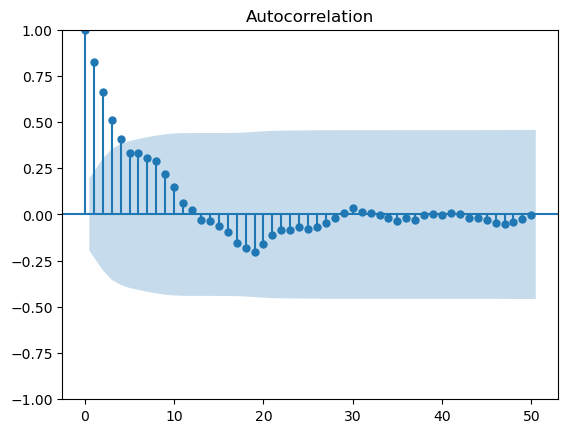

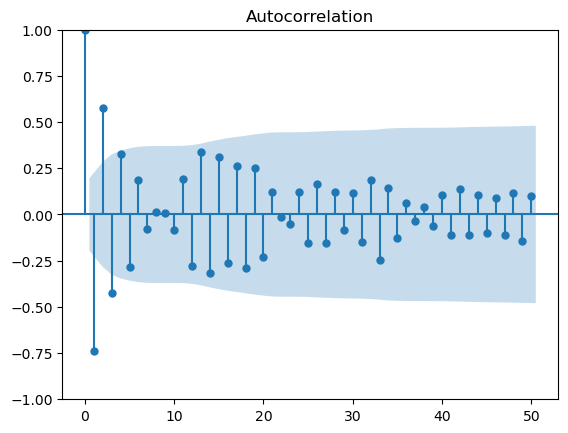

In [3]:
plt.figure(figsize = (10, 5))
plot_acf(z1, lags=50)
plot_acf(z2, lags=50)
plt.show()

5) Сравните эти графики между собой: укажите их сходства и различия, 
а также характерные особенности, которые позволяют отнести их к 
модели АР первого порядка.

Наиболее высоким коэффициентом автокорреляции оказался p(1), то есть первый порядок, что означает о присутствии тренда в обоих ВР. 

Оба графика с ростом лага затухают, однако первый график делает это постепенно, в этом можно убедиться, посмотрев на последующие порядки(2, 3, и т.д., то есть с ростом лага коэффициент автокореляции уменьшается), в отличие от второго, который затухает знакопеременно.

В самом деле, после 1-го порядка наибольшим идёт 2-й порядок с положительным коэффициентом, затем 3-й порядок снова отрицательный и так на протяжении всего графика. 

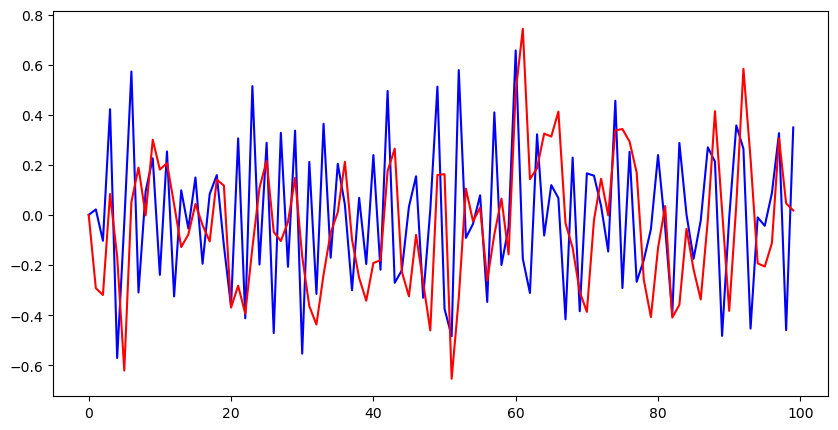

In [4]:
z3 = np.zeros(100)
z4 = np.zeros(100)
ar = 0.2 * np.random.randn(100)
for i in range(1, 100):
 z3[i] = ar[i] - 0.8 * ar[i - 1]
 z4[i] = ar[i] + 0.8 * ar[i - 1]
plt.figure(figsize = (10, 5))
plt.plot(z3, 'b')
plt.plot(z4, 'r')
plt.show()

<Figure size 1000x500 with 0 Axes>

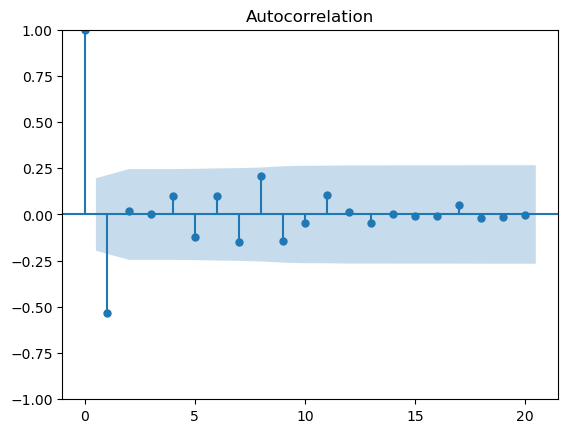

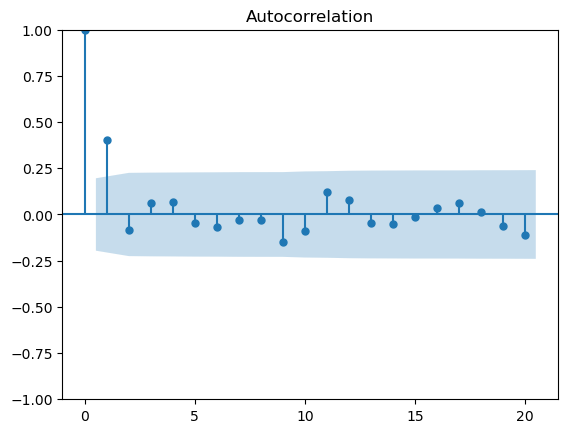

In [5]:
plt.figure(figsize = (10, 5))
plot_acf(z3, lags=20)
plot_acf(z4, lags=20)
plt.show()

Оба графика имеют наибольшее значение коэффициента автокорреляции при порядке 1, следовательно у них наблюдается тренд.

При дальнейшем визуальном осмотре можно выделить следующее:
1. На обоих графиках наблюдается затухающая знакопеременность
2. На первом графике знакопеременность чередуется через 1 точку, на втором же графике при визуальном осмотре похоже на синусоидную знакопеременность.

10 задание

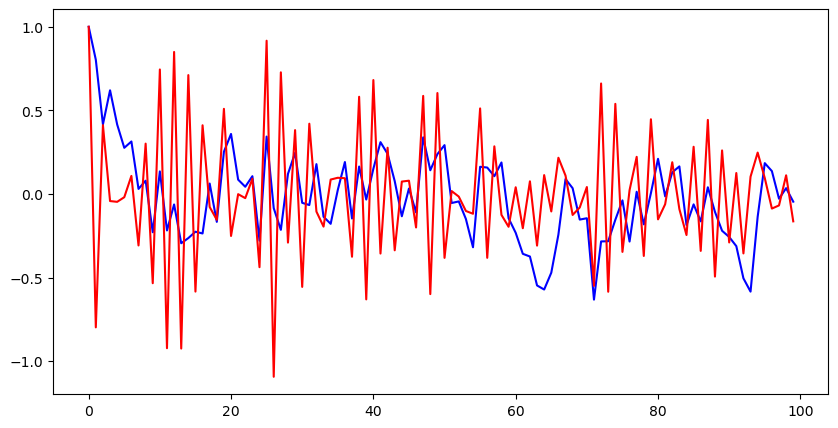

In [8]:
z5 = np.zeros(100)
z6 = np.zeros(100)
z5[0], z6[0] = 1, 1
a = 0.2 * np.random.randn(100)
for i in range(1, len(z5)):
    z5[i] = 0.8 * z5[i-1] + a[i] - 0.3 * a[i-1]
    z6[i] = -0.8 * z6[i-1] + a[i] - 0.3 * a[i-1]

plt.figure(figsize = (10, 5))
plt.plot(z5, 'b')
plt.plot(z6, 'r')
plt.show()

<Figure size 1000x500 with 0 Axes>

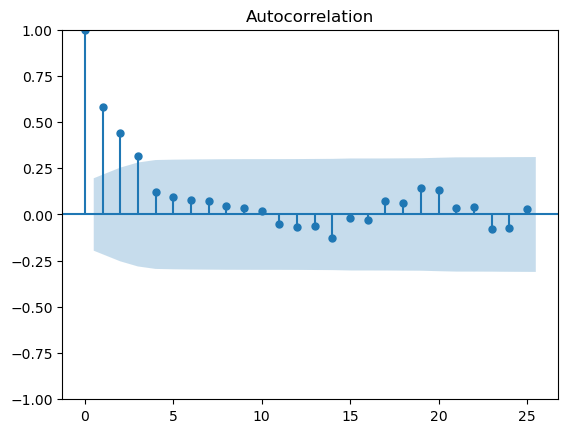

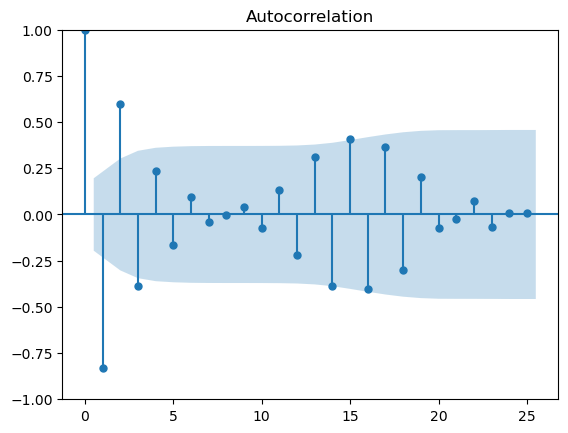

In [10]:
plt.figure(figsize = (10, 5))
plot_acf(z5, lags=len(z5)/4)
plot_acf(z6, lags=len(z5)/4)
plt.show()

In [11]:
from statsmodels.tsa.arima_process import arma_generate_sample
ar = np.array([0.75, -0.25]) # задаем коэффициенты АР
ma = np.array([0.65, 0.35]) # задаем коэффициенты СС 
y = arma_generate_sample(np.r_[1, -ar], np.r_[1, ma], 100)
# создаем ВР для АРСС (2, 2) = АРПСС (2, 0, 2) из 100 отсчетов

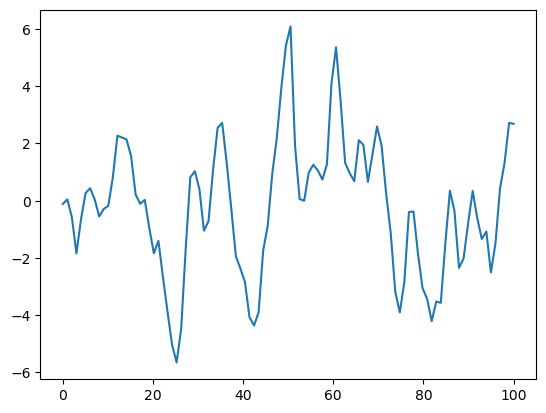

In [13]:
t = np.linspace(0, 100, 100)
plt.plot(t, y)

<Figure size 1000x500 with 0 Axes>

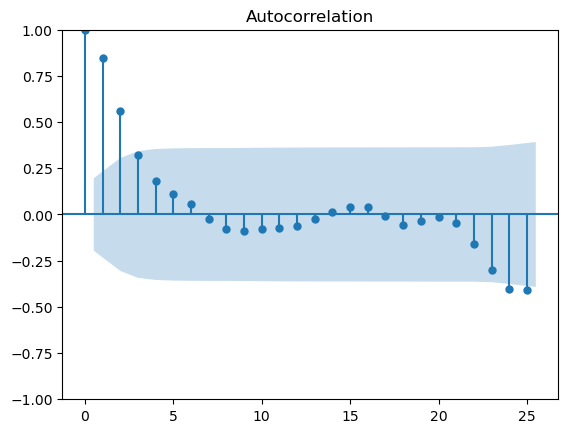

In [16]:
plt.figure(figsize = (10, 5))
plot_acf(y, lags=len(y)/4)
plt.show()